In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Date Functionality
import matplotlib.dates as mdates

# Statistics
from statistics import stdev
from scipy.stats import t

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = ("C:/Users/Belema Amah/Downloads/QVI_data.csv")

In [3]:
df = pd.read_csv(path)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [7]:
df["YEAR_MONTH"]=pd.to_datetime(df["DATE"]).dt.to_period("M")   #   Storing the year and month of the recorded duration in a separate column
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [8]:
total_sales=df.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()    #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and summing up the total sales for them.
total_sales=total_sales.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_sales

TOT_SALES
STORE_NBR YEAR_MONTH           
1         2018-07         206.9
          2018-08         176.1
          2018-09         278.8
          2018-10         188.1
          2018-11         192.6
...                         ...
272       2019-02         395.5
          2019-03         442.3
          2019-04         445.1
          2019-05         314.6
          2019-06         312.1

[3169 rows x 1 columns]

In [9]:
total_customers = df.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()  #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of customers for them.
total_customers=total_customers.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_customers

LYLTY_CARD_NBR
STORE_NBR YEAR_MONTH                
1         2018-07                 49
          2018-08                 42
          2018-09                 59
          2018-10                 44
          2018-11                 46
...                              ...
272       2019-02                 45
          2019-03                 50
          2019-04                 54
          2019-05                 34
          2019-06                 34

[3169 rows x 1 columns]

In [10]:
transactions_per_customer = df.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].nunique()/df.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()   #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of transactions per customer for them.
transactions_per_customer=transactions_per_customer.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
transactions_per_customer

0
STORE_NBR YEAR_MONTH          
1         2018-07     1.061224
          2018-08     1.023810
          2018-09     1.050847
          2018-10     1.022727
          2018-11     1.021739
...                        ...
272       2019-02     1.066667
          2019-03     1.060000
          2019-04     1.018519
          2019-05     1.176471
          2019-06     1.088235

[3169 rows x 1 columns]

In [11]:
# Chips per customer for each store and month.

chips_per_customer = df.groupby(['STORE_NBR', 'YEAR_MONTH']).PROD_QTY.sum()/ df.groupby(['STORE_NBR', 'YEAR_MONTH']).TXN_ID.nunique()
chips_per_customer

STORE_NBR  YEAR_MONTH
1          2018-07       1.192308
           2018-08       1.255814
           2018-09       1.209677
           2018-10       1.288889
           2018-11       1.212766
                           ...   
272        2019-02       1.895833
           2019-03       1.905660
           2019-04       1.909091
           2019-05       1.775000
           2019-06       1.891892
Length: 3169, dtype: float64

In [12]:
# Average price per unit for each store and month.

average_price = df.groupby(['STORE_NBR', 'YEAR_MONTH']).TOT_SALES.sum()/ df.groupby(['STORE_NBR', 'YEAR_MONTH']).PROD_QTY.sum()
average_price

STORE_NBR  YEAR_MONTH
1          2018-07       3.337097
           2018-08       3.261111
           2018-09       3.717333
           2018-10       3.243103
           2018-11       3.378947
                           ...   
272        2019-02       4.346154
           2019-03       4.379208
           2019-04       4.239048
           2019-05       4.430986
           2019-06       4.458571
Length: 3169, dtype: float64

In [13]:
product_quantity = df.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].sum() # calculating for the sum of product quantity
product_quantity = product_quantity.to_frame()
product_quantity

PROD_QTY
STORE_NBR YEAR_MONTH          
1         2018-07           62
          2018-08           54
          2018-09           75
          2018-10           58
          2018-11           57
...                        ...
272       2019-02           91
          2019-03          101
          2019-04          105
          2019-05           71
          2019-06           70

[3169 rows x 1 columns]

In [14]:
dataframe_list=[total_sales, total_customers, transactions_per_customer, chips_per_customer, product_quantity, average_price]    #   Creating a list of all the pandas.DataFrames.
dataframe=pd.concat(dataframe_list, axis=1) #   Concatenating all the pandas.DataFrames into one.
dataframe.columns=["TOT_SALES", "TOT_CUST", "TXN_PER_CUST", "CHIPS_PER_CUST", "PROD_QTY", "AVG_PRICE"] #   Renaming the columns of the pandas.DataFrame.
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST  CHIPS_PER_CUST   
STORE_NBR YEAR_MONTH                                                      
1         2018-07         206.9        49      1.061224        1.192308  \
          2018-08         176.1        42      1.023810        1.255814   
          2018-09         278.8        59      1.050847        1.209677   
          2018-10         188.1        44      1.022727        1.288889   
          2018-11         192.6        46      1.021739        1.212766   
...                         ...       ...           ...             ...   
272       2019-02         395.5        45      1.066667        1.895833   
          2019-03         442.3        50      1.060000        1.905660   
          2019-04         445.1        54      1.018519        1.909091   
          2019-05         314.6        34      1.176471        1.775000   
          2019-06         312.1        34      1.088235        1.891892   

                      PROD_QTY  AVG_PRICE  
STORE_NBR YEAR_MONTH                       
1         2018-07           62   3.337097  
          2018-08           54   3.261111  
          2018-09           75   3.717333  
          2018-10           58   3.243103  
          2018-11           57   3.378947  
...                        ...        ...  
272       2019-02           91   4.346154  
          2019-03          101   4.379208  
          2019-04          105   4.239048  
          2019-05           71   4.430986  
          2019-06           70   4.458571  

[3169 rows x 6 columns]

In [15]:
dataframe.isnull().sum()

TOT_SALES         0
TOT_CUST          0
TXN_PER_CUST      0
CHIPS_PER_CUST    0
PROD_QTY          0
AVG_PRICE         0
dtype: int64


Since the dataset contains transaction details of many stores, there may be some stores that did not record sales for the entire duration

In [16]:
recorded_stores=pd.pivot_table(df, index="STORE_NBR", columns="YEAR_MONTH", values="TXN_ID", aggfunc="count") #   Pivoting the pandas.DataFrame to get all the recorded transactions for each store during the entire duration.
recorded_stores

YEAR_MONTH,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [17]:
recorded_stores.isnull().sum()

YEAR_MONTH
2018-07    6
2018-08    9
2018-09    8
2018-10    7
2018-11    8
2018-12    9
2019-01    9
2019-02    8
2019-03    7
2019-04    7
2019-05    9
2019-06    8
Freq: M, dtype: int64

As we can see, there are null values for a few months, which means that some of these are unrecorded for certain stores, so we need to find them and remove these stores from the dataset, since they can't be control stores anyway.

In [18]:
unrecorded_stores=[]
for i in recorded_stores.index:
    if recorded_stores.loc[i].isnull().any():
        unrecorded_stores.append(i)
unrecorded_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [19]:
dataframe = dataframe.drop(unrecorded_stores, axis =0)
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST  CHIPS_PER_CUST   
STORE_NBR YEAR_MONTH                                                      
1         2018-07         206.9        49      1.061224        1.192308  \
          2018-08         176.1        42      1.023810        1.255814   
          2018-09         278.8        59      1.050847        1.209677   
          2018-10         188.1        44      1.022727        1.288889   
          2018-11         192.6        46      1.021739        1.212766   
...                         ...       ...           ...             ...   
272       2019-02         395.5        45      1.066667        1.895833   
          2019-03         442.3        50      1.060000        1.905660   
          2019-04         445.1        54      1.018519        1.909091   
          2019-05         314.6        34      1.176471        1.775000   
          2019-06         312.1        34      1.088235        1.891892   

                      PROD_QTY  AVG_PRICE  
STORE_NBR YEAR_MONTH                       
1         2018-07           62   3.337097  
          2018-08           54   3.261111  
          2018-09           75   3.717333  
          2018-10           58   3.243103  
          2018-11           57   3.378947  
...                        ...        ...  
272       2019-02           91   4.346154  
          2019-03          101   4.379208  
          2019-04          105   4.239048  
          2019-05           71   4.430986  
          2019-06           70   4.458571  

[3120 rows x 6 columns]

We can filter the dataset to the pre-trial duration — that is, before February 2022

In [20]:
pre_trial_data=dataframe.loc[dataframe.index.get_level_values("YEAR_MONTH")<"2019-02"]  #   Extracting the pandas.DataFrame for the pre-trial duration.
pre_trial_data

TOT_SALES  TOT_CUST  TXN_PER_CUST  CHIPS_PER_CUST   
STORE_NBR YEAR_MONTH                                                      
1         2018-07         206.9        49      1.061224        1.192308  \
          2018-08         176.1        42      1.023810        1.255814   
          2018-09         278.8        59      1.050847        1.209677   
          2018-10         188.1        44      1.022727        1.288889   
          2018-11         192.6        46      1.021739        1.212766   
...                         ...       ...           ...             ...   
272       2018-09         304.7        32      1.125000        1.972222   
          2018-10         430.6        44      1.136364        1.980000   
          2018-11         376.2        41      1.097561        1.933333   
          2018-12         403.9        47      1.000000        1.893617   
          2019-01         423.0        46      1.086957        1.920000   

                      PROD_QTY  AVG_PRICE  
STORE_NBR YEAR_MONTH                       
1         2018-07           62   3.337097  
          2018-08           54   3.261111  
          2018-09           75   3.717333  
          2018-10           58   3.243103  
          2018-11           57   3.378947  
...                        ...        ...  
272       2018-09           71   4.291549  
          2018-10           99   4.349495  
          2018-11           87   4.324138  
          2018-12           89   4.538202  
          2019-01           96   4.406250  

[1820 rows x 6 columns]

Funtions to find correlation and magnitude of any store wih another store

In [21]:
pre_trial_data


TOT_SALES  TOT_CUST  TXN_PER_CUST  CHIPS_PER_CUST   
STORE_NBR YEAR_MONTH                                                      
1         2018-07         206.9        49      1.061224        1.192308  \
          2018-08         176.1        42      1.023810        1.255814   
          2018-09         278.8        59      1.050847        1.209677   
          2018-10         188.1        44      1.022727        1.288889   
          2018-11         192.6        46      1.021739        1.212766   
...                         ...       ...           ...             ...   
272       2018-09         304.7        32      1.125000        1.972222   
          2018-10         430.6        44      1.136364        1.980000   
          2018-11         376.2        41      1.097561        1.933333   
          2018-12         403.9        47      1.000000        1.893617   
          2019-01         423.0        46      1.086957        1.920000   

                      PROD_QTY  AVG_PRICE  
STORE_NBR YEAR_MONTH                       
1         2018-07           62   3.337097  
          2018-08           54   3.261111  
          2018-09           75   3.717333  
          2018-10           58   3.243103  
          2018-11           57   3.378947  
...                        ...        ...  
272       2018-09           71   4.291549  
          2018-10           99   4.349495  
          2018-11           87   4.324138  
          2018-12           89   4.538202  
          2019-01           96   4.406250  

[1820 rows x 6 columns]

In [22]:
def calcCorr(store):
    '''
    input=store number which is to be compared
    output=dataframe with corelation coefficient values
    '''
    a=[]
    metrix=pre_trial_data[['TOT_SALES','TOT_CUST']]#add metrics as required e.g. ,'TXN_PER_CUST'
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    dfa= pd.DataFrame(a)
    dfa.index=metrix.index
    dfa=dfa.drop_duplicates()
    dfa.index=[s[0] for s in dfa.index]
    dfa.index.name="STORE_NBR"
    return dfa

In [23]:
def standardizer(dfa):
    '''
    input=dataframe with metrics
    output=dataframe with mean of the metrics in a new column
    '''
    dfa=dfa.abs()
    dfa['MAGNITUDE']=dfa.mean(axis=1)
    return dfa

###  STORE_NBR 77

Finding stores corelated to store 77

In [24]:
corr77=calcCorr(77)

In [25]:
corr77.head(3)

,TOT_SALES,TOT_CUST
STORE_NBR,,
1,0.075218,0.322168
2,-0.263079,-0.572051
3,0.806644,0.834207


In [26]:
corr77=standardizer(corr77)
corr77

,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
1,0.075218,0.322168,0.198693
2,0.263079,0.572051,0.417565
3,0.806644,0.834207,0.820426
4,0.263300,0.295639,0.279469
5,0.110652,0.370659,0.240655
...,...,...,...
268,0.344757,0.369517,0.357137
269,0.315730,0.474293,0.395011
270,0.315430,0.131259,0.223345


In [27]:
corr77=corr77.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [28]:
corr77


,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426
...,...,...,...
256,0.014245,0.047863,0.031054
159,0.001655,0.054404,0.028030
260,0.016618,0.027446,0.022032


#### This shows that stores 233, 119, 71 are the most correlated to store 77

### Selecting store 233 as ourcontrol store as it has the most correlation

## Visualizing

<AxesSubplot:xlabel='STORE_NBR'>

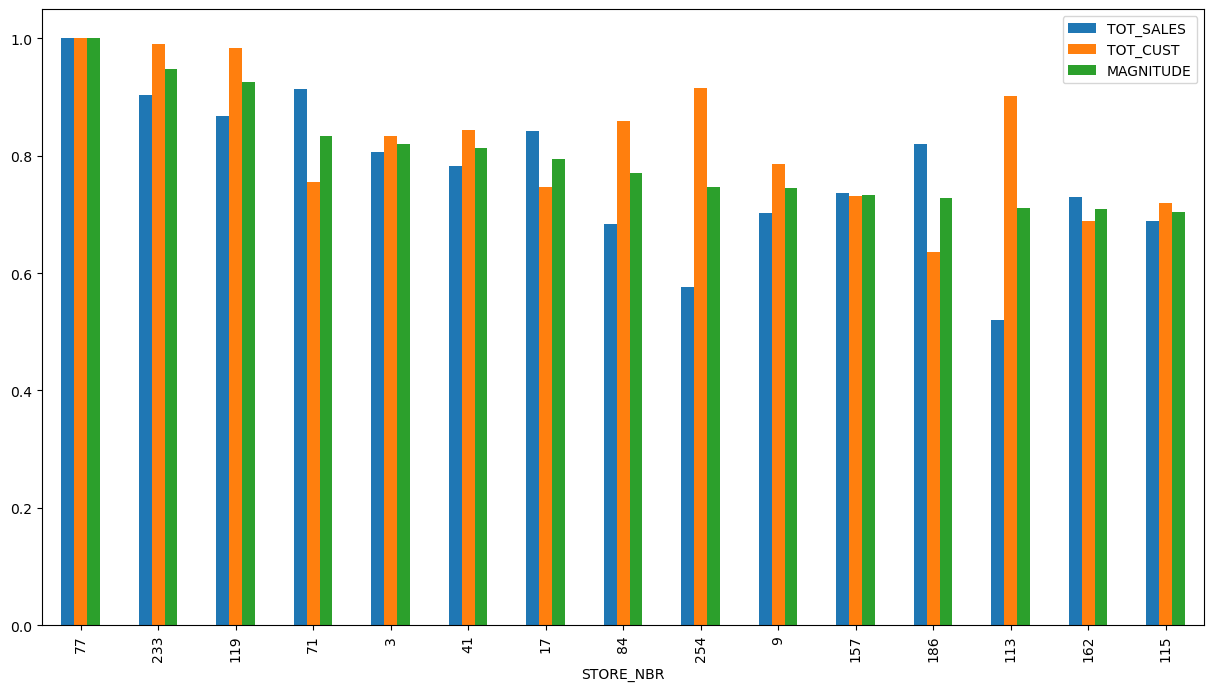

In [29]:
#Taking 0.7 as threshold corelation
corr77[(corr77.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))

<AxesSubplot:ylabel='STORE_NBR'>

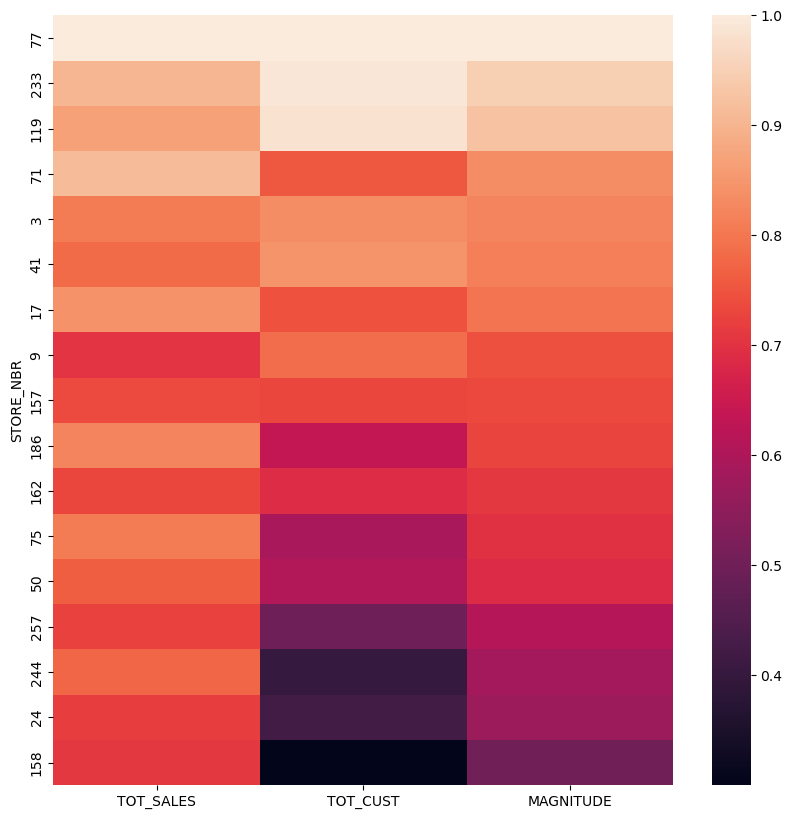

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr77[corr77.TOT_SALES.abs()>0.7])

We can clearly see that store 233 has the most correlation

Taking the store 233 into consideration plotting different measure against those of store 77


### Calculating difference between scaled control sales and trial sales

Let null hypothesis be that both stores 77 ans 233 have no difference

In [30]:
from scipy.stats import ks_2samp,ttest_ind,t

In [31]:
# difference between control and trial sales
a=[]
for x in pre_trial_data.columns:
    a.append(ks_2samp(pre_trial_data.loc[77][x], pre_trial_data.loc[233][x]))
a=pd.DataFrame(a,index=pre_trial_data.columns)

In [32]:
a


,statistic,pvalue
TOT_SALES,0.285714,0.962704
TOT_CUST,0.142857,0.999961
TXN_PER_CUST,0.428571,0.575175
CHIPS_PER_CUST,0.285714,0.962704
PROD_QTY,0.285714,0.962704
AVG_PRICE,0.285714,0.962704


For pre trial period, since all of the p-values are high (say more than 0.05), we can't reject the null hypothesis

## Assessment of trial period

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

Sampling march and april from the 3 months

In [33]:
trial = dataframe.loc[(dataframe.index.get_level_values("YEAR_MONTH") >= "2019-02") & (dataframe.index.get_level_values("YEAR_MONTH") <= "2019-04")]
 #   Extracting the pandas.DataFrame for the pre-trial duration.
trial

TOT_SALES  TOT_CUST  TXN_PER_CUST  CHIPS_PER_CUST   
STORE_NBR YEAR_MONTH                                                      
1         2019-02         225.4        52      1.057692        1.181818  \
          2019-03         192.9        45      1.088889        1.183673   
          2019-04         192.9        42      1.023810        1.325581   
2         2019-02         139.4        29      1.103448        1.156250   
          2019-03         192.1        43      1.069767        1.108696   
...                         ...       ...           ...             ...   
271       2019-03         735.8        79      1.278481        2.000000   
          2019-04         774.6        87      1.252874        2.000000   
272       2019-02         395.5        45      1.066667        1.895833   
          2019-03         442.3        50      1.060000        1.905660   
          2019-04         445.1        54      1.018519        1.909091   

                      PROD_QTY  AVG_PRICE  
STORE_NBR YEAR_MONTH                       
1         2019-02           65   3.467692  
          2019-03           58   3.325862  
          2019-04           57   3.384211  
2         2019-02           37   3.767568  
          2019-03           51   3.766667  
...                        ...        ...  
271       2019-03          202   3.642574  
          2019-04          218   3.553211  
272       2019-02           91   4.346154  
          2019-03          101   4.379208  
          2019-04          105   4.239048  

[780 rows x 6 columns]

In [34]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[77][x].tail(2), trial.loc[233][x].tail(2)))
b=pd.DataFrame(b,index=dataframe.columns)

In [35]:
b

,statistic,pvalue
TOT_SALES,4.267336,0.050769
TOT_CUST,2.586131,0.122618
TXN_PER_CUST,0.332434,0.771171
CHIPS_PER_CUST,1.785126,0.216165
PROD_QTY,4.043680,0.056063
AVG_PRICE,-0.634173,0.590828


In [36]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.
We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

### Conclusion

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.




## Store 86

Repeating same process for trial store 86

In [39]:
corr86=calcCorr(86)

In [41]:
corr86.head()

,TOT_SALES,TOT_CUST
STORE_NBR,,
1,0.445632,0.485831
2,-0.403835,-0.086161
3,-0.261284,-0.353786
4,-0.039035,-0.169608
5,0.235159,-0.253229


In [42]:
corr86=standardizer(corr86)
corr86

,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
1,0.445632,0.485831,0.465731
2,0.403835,0.086161,0.244998
3,0.261284,0.353786,0.307535
4,0.039035,0.169608,0.104322
5,0.235159,0.253229,0.244194
...,...,...,...
268,0.452182,0.034273,0.243228
269,0.697055,0.098587,0.397821
270,0.730679,0.767267,0.748973


In [43]:
corr86=corr86.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [44]:
corr86

,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877
...,...,...,...
91,0.019027,0.041271,0.030149
17,0.029793,0.030039,0.029916
131,0.028487,0.031142,0.029815


This shows that store 155 has the most correlation to store 86

### Selecting 155 as our control store 

<AxesSubplot:xlabel='STORE_NBR'>

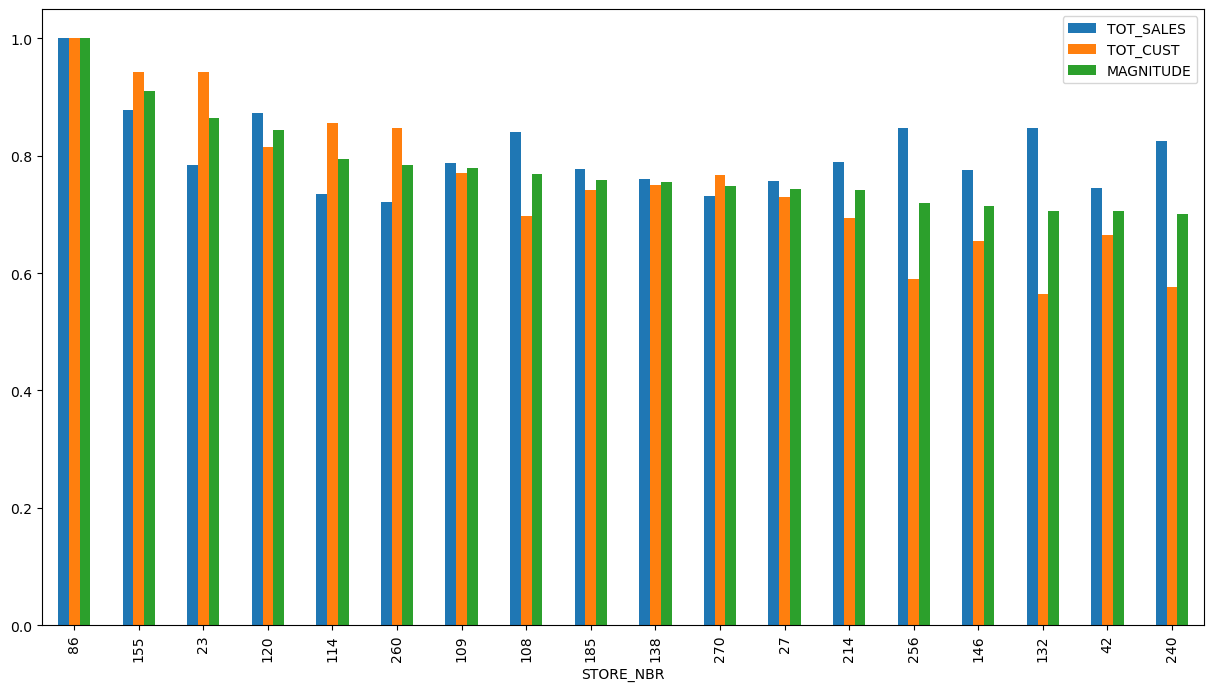

In [45]:
# Using visualization to check
#Taking 0.7 as threshold corelation
corr86[(corr86.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))

<AxesSubplot:ylabel='STORE_NBR'>

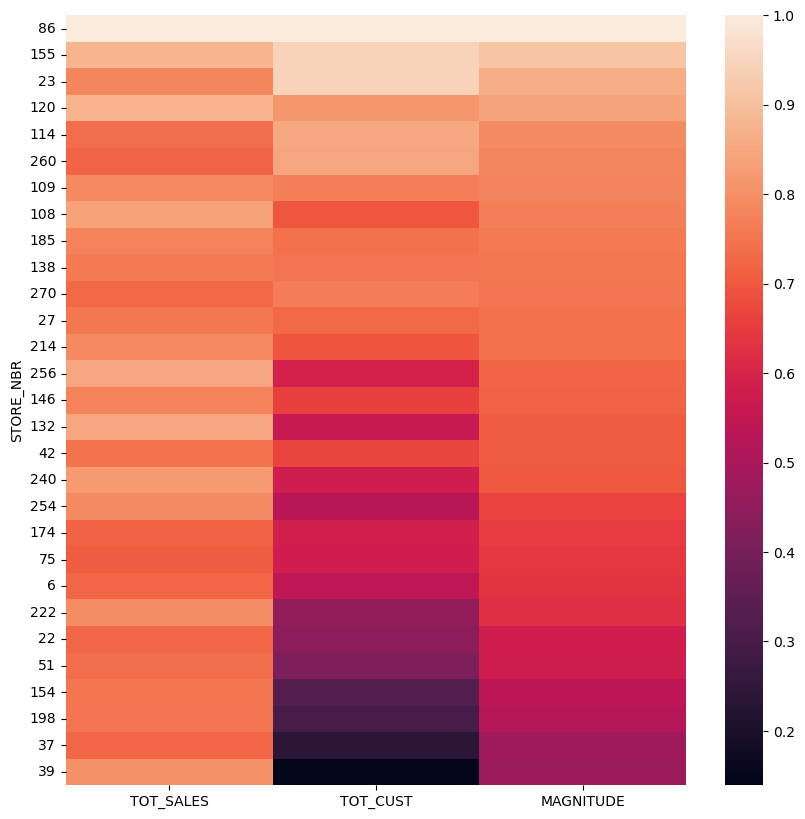

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr86[corr86.TOT_SALES.abs()>0.7])

Since distributions of store 155 are similar to that of store 86, selecting store 155 as control store with max similarities to store 86

### Calculating difference between scaled control sales and trial sales

In [51]:
# difference between control and trial sales
a=[]
for x in pre_trial_data.columns:
    a.append(ks_2samp(pre_trial_data.loc[86][x], pre_trial_data.loc[155][x]))
a=pd.DataFrame(a,index=pre_trial_data.columns)

In [52]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
TOT_CUST,0.285714,0.962704
TXN_PER_CUST,0.428571,0.575175
CHIPS_PER_CUST,0.428571,0.575175
PROD_QTY,0.285714,0.962704
AVG_PRICE,0.428571,0.575175


For pre trial period, since p-values for TOT_SALES, TOT_CUST and PROD_QTY are high (say more than 0.95), we can't reject the null hypothesis

### Assessment of trial

In [54]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[155][x].tail(2)))
b=pd.DataFrame(b,index=dataframe.columns)

In [55]:
b

,statistic,pvalue
TOT_SALES,1.234512,0.342378
TOT_CUST,2.414953,0.137076
TXN_PER_CUST,-1.074767,0.394929
CHIPS_PER_CUST,-0.285938,0.801822
PROD_QTY,1.862532,0.203568
AVG_PRICE,0.366214,0.749316


In [56]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.
We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

### Conclusion

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.







## Store 88

Finding stores corelated to store 88

In [57]:
corr88=calcCorr(88)


In [58]:
corr88.head()

,TOT_SALES,TOT_CUST
STORE_NBR,,
1,0.813636,0.305334
2,-0.067927,-0.452379
3,-0.507847,0.522884
4,-0.745566,-0.361503
5,0.190330,-0.025320


In [59]:
corr88=standardizer(corr88)
corr88

,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
1,0.813636,0.305334,0.559485
2,0.067927,0.452379,0.260153
3,0.507847,0.522884,0.515365
4,0.745566,0.361503,0.553534
5,0.190330,0.025320,0.107825
...,...,...,...
268,0.021429,0.672672,0.347050
269,0.172578,0.274781,0.223679
270,0.723272,0.103032,0.413152


In [60]:
corr88=corr88.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [61]:
corr88.head(10)

,TOT_SALES,TOT_CUST,MAGNITUDE
STORE_NBR,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018
134,0.864293,0.508880,0.686587
113,0.495763,0.862632,0.679198
253,0.811838,0.500962,0.656400
239,0.642329,0.660672,0.651501


shows that stores 178,14,133 are the most correlated to store 88

### Visualizing

<AxesSubplot:xlabel='STORE_NBR'>

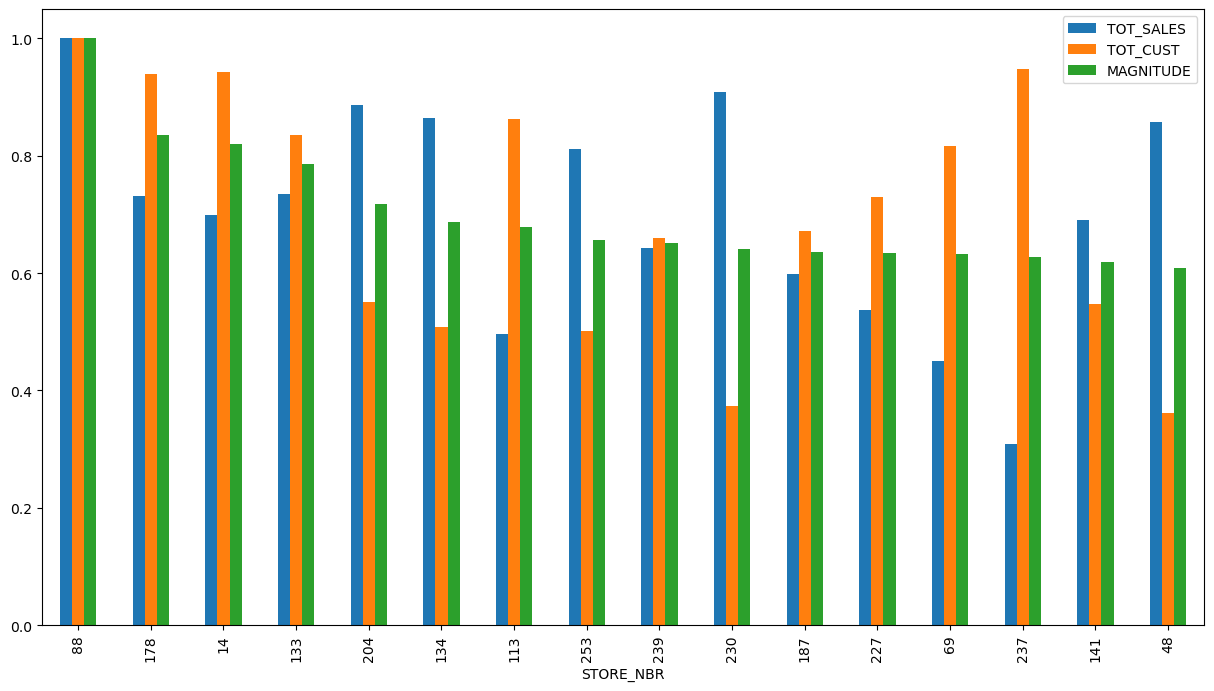

In [62]:
#Taking 0.6 as threshold corelation
corr88[(corr88.MAGNITUDE.abs()>0.6)].plot(kind='bar',figsize=(15,8))

<AxesSubplot:ylabel='STORE_NBR'>

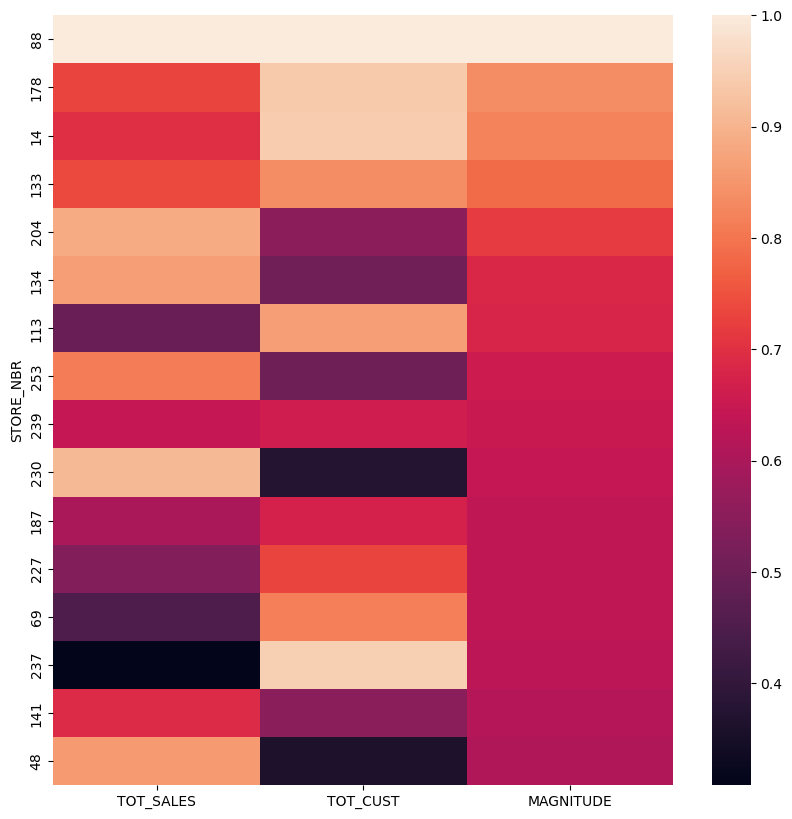

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr88[corr88.MAGNITUDE.abs()>0.6])

Since distributions of store 237 are similar to that of store 88, selecting store 237 as control store with max similarities to store 88

### Calculating difference between scaled control sales and trial sales

Let null hypothesis be that both stores 88 and 237 have no difference

In [66]:
# difference between control and trial sales
a=[]
for x in pre_trial_data.columns:
    a.append(ks_2samp(pre_trial_data.loc[88][x], pre_trial_data.loc[237][x]))
a=pd.DataFrame(a,index=pre_trial_data.columns)

In [67]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
TOT_CUST,0.285714,0.962704
TXN_PER_CUST,0.285714,0.962704
CHIPS_PER_CUST,0.571429,0.212121
PROD_QTY,0.285714,0.962704
AVG_PRICE,0.428571,0.575175


For pre trial period, since all of the p-values are high (say more than 0.05), we can't reject the null hypothesis

### Assessment of trial

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

Sampling march and april from the 3 months

In [68]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[237][x].tail(2)))
b=pd.DataFrame(b,index=dataframe.columns)

In [69]:
b

,statistic,pvalue
TOT_SALES,-3.010587,0.094888
TOT_CUST,-1.890571,0.199245
TXN_PER_CUST,9.547202,0.010794
CHIPS_PER_CUST,-0.465456,0.687370
PROD_QTY,-0.266076,0.815100
AVG_PRICE,-6.804115,0.020925


In [70]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

## Conclusion

The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.